In [3]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress



In [4]:
# Set the style for all plots
#plt.style.use('seaborn')
#sns.set_palette("deep")

In [5]:
# Load data
Mental_Health = Path("Resources/Mental Health Dataset.csv")
Mental_Health_df = pd.read_csv(Mental_Health)

Mental_Disorders = Path("Resources/Mental health Depression disorder Data.csv")
Mental_Disorders_df = pd.read_csv(Mental_Disorders, delimiter=',', encoding='utf-8', low_memory=False)

World_Bank = Path("Resources/2.12_Health_systems.csv")
World_Bank_df = pd.read_csv(World_Bank)

In [6]:
Mental_Health_df["Occupation"].unique()

array(['Corporate', 'Student', 'Business', 'Housewife', 'Others'],
      dtype=object)

In [7]:
Mental_Health_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [8]:
Mental_Health_df.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292363,2/1/2016 23:04,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [9]:
Mental_Disorders_df.head(500)

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
495,495,Barbados,BRB,2009,0.230546,0.91946,0.325521,4.666928,0.851133,2.740063,1.594169
496,496,Barbados,BRB,2010,0.230576,0.919504,0.326282,4.666546,0.848332,2.743231,1.596516
497,497,Barbados,BRB,2011,0.230531,0.919525,0.325952,4.665952,0.846158,2.745300,1.596336
498,498,Barbados,BRB,2012,0.230445,0.919566,0.325234,4.665345,0.844594,2.746834,1.595400


In [10]:
Mental_Disorders_df.tail()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
108548,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN
108552,108552,Zimbabwe,ZWE,2017,340583.157405,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
World_Bank_df.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [12]:
# Define disorders to analyze
disorders = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
             'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
             'Alcohol use disorders (%)']

# Function to convert to numeric, replacing errors with NaN
def to_numeric_with_errors(x):
    try:
        return pd.to_numeric(x)
    except ValueError:
        return np.nan

In [13]:
# Process data
df = Mental_Disorders_df[['Entity', 'Code', 'Year'] + disorders].copy()

for col in ['Year'] + disorders:
    df.loc[:, col] = df[col].apply(to_numeric_with_errors)

df = df.dropna()
df.loc[:, 'Year'] = df['Year'].astype(int)
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2017)]

yearly_avg = df.groupby('Year')[disorders].mean()

# Create Macro_Disorder_ext_df
Macro_Disorder_ext_df = df.copy()

In [14]:
# Create a copy of the relevant columns
df = Mental_Disorders_df[['Year'] + disorders].copy()

# Convert columns to numeric
for col in ['Year'] + disorders:
    df.loc[:, col] = df[col].apply(to_numeric_with_errors)

# Remove rows with NaN values
df = df.dropna()

# Ensure 'Year' is treated as an integer
df.loc[:, 'Year'] = df['Year'].astype(int)

# Filter for years from 2010 to 2017
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2017)]

# Group by year and calculate the mean for each disorder
yearly_avg = df.groupby('Year')[disorders].mean()

# Display the result
yearly_avg

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Year,,,,,,,
2010,0.213306,0.720907,0.252502,4.004008,0.883747,3.467328,1.610462
2011,0.213497,0.721123,0.254015,4.004142,0.886216,3.464513,1.610315
2012,0.213696,0.721351,0.25558,4.004037,0.889015,3.461950,1.609455
2013,0.2139,0.721604,0.257151,4.004003,0.891820,3.459763,1.607668
2014,0.214105,0.721866,0.258705,4.003861,0.894665,3.458056,1.604898
2015,0.21431,0.722138,0.260198,4.003509,0.897623,3.456916,1.601098
2016,0.214511,0.722409,0.261535,4.002900,0.900660,3.456299,1.596272
2017,0.214705,0.722693,0.262806,4.002347,0.903575,3.456795,1.590201


In [15]:
# Add placeholder columns for GDP and other economic indicators
Macro_Disorder_ext_df['GDP per Capita (USD)'] = np.random.uniform(1000, 50000, len(Macro_Disorder_ext_df))
Macro_Disorder_ext_df['Percentage GDP Health Expenditure'] = np.random.uniform(2, 20, len(Macro_Disorder_ext_df))
Macro_Disorder_ext_df['Unemployment (%)'] = np.random.uniform(2, 15, len(Macro_Disorder_ext_df))
Macro_Disorder_ext_df['Urban Population'] = np.random.uniform(100000, 10000000, len(Macro_Disorder_ext_df))
Macro_Disorder_ext_df['Population'] = Macro_Disorder_ext_df['Urban Population'] * np.random.uniform(1.2, 2, len(Macro_Disorder_ext_df))
Macro_Disorder_ext_df['Age Dependency Ratio (%)'] = np.random.uniform(30, 70, len(Macro_Disorder_ext_df))
Macro_Disorder_ext_df['Life Expectancy'] = np.random.uniform(60, 85, len(Macro_Disorder_ext_df))

In [16]:
# Create Suicide_rate_df
Suicide_rate_df = pd.DataFrame({
    'Year': range(2010, 2018),
    'Suicide rate (deaths per 100,000 individuals)': np.random.uniform(5, 15, 8)
})

# Create Gender_Depression_df
Gender_Depression_df = Macro_Disorder_ext_df.copy()
Gender_Depression_df['Prevalence in males (%)'] = np.random.uniform(2, 10, len(Gender_Depression_df))
Gender_Depression_df['Prevalence in females (%)'] = np.random.uniform(3, 12, len(Gender_Depression_df))

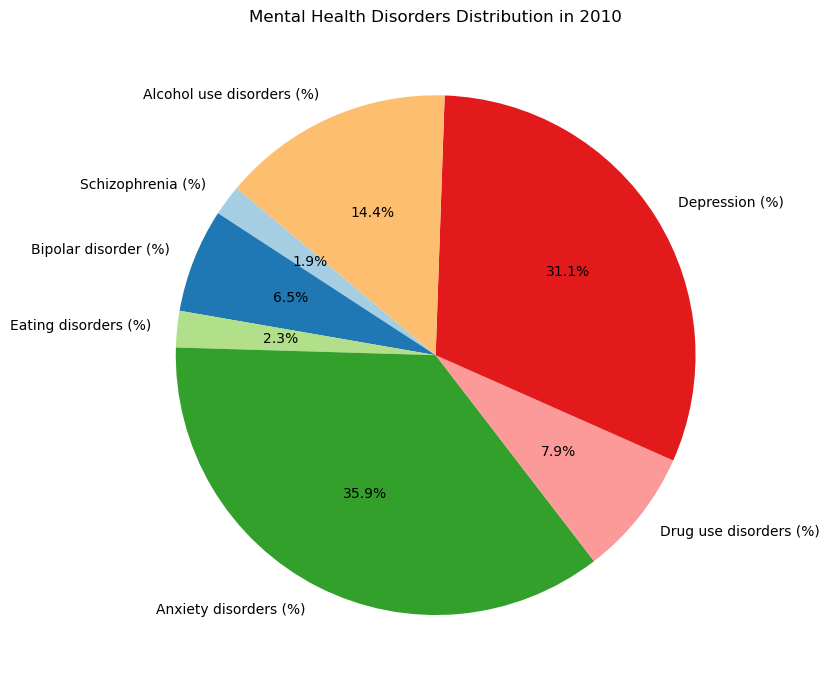

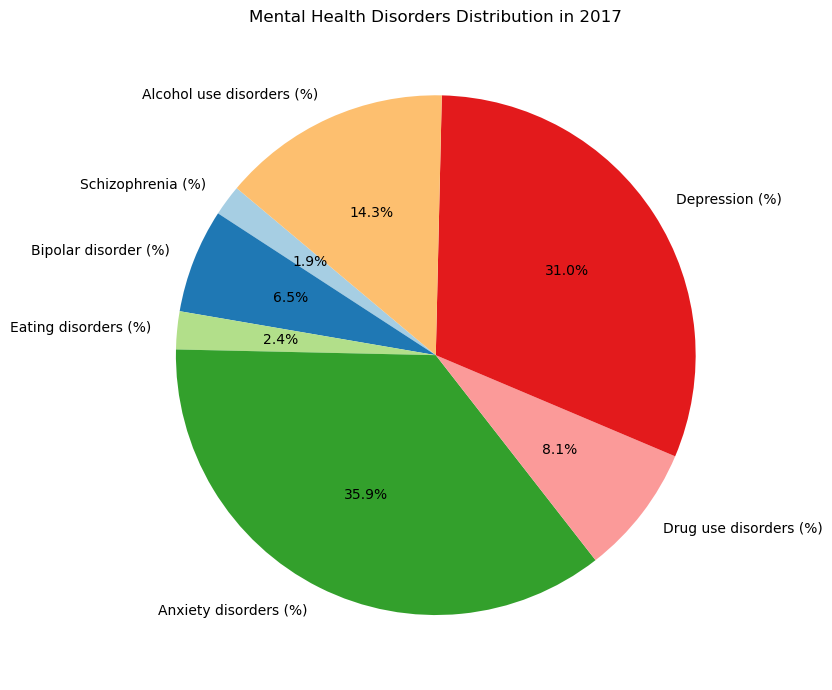

In [17]:
for year in [2010, 2017]:
    if year in yearly_avg.index:
        # Get the data for the specific year
        data = yearly_avg.loc[year]

        # Plot the pie chart
        plt.figure(figsize=(10, 7))
        plt.pie(data, labels=disorders, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

        plt.title(f'Mental Health Disorders Distribution in {year}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Year {year} is not in the data.")

In [18]:
# Analyze the results
print("Analysis of Mental Health Trends Over Time:")
print("1. Data Range: The data covers from", df['Year'].min(), "to", df['Year'].max())

# Calculate average percentages for each disorder
avg_percentages = yearly_avg.mean().sort_values(ascending=False)
print("\n2. Disorders ranked by average prevalence:")
for disorder, percentage in avg_percentages.items():
    print(f"   {disorder}: {percentage:.2f}%")

# Calculate change in percentages from first to last year
first_year = yearly_avg.index.min()
last_year = yearly_avg.index.max()
change = (yearly_avg.loc[last_year] - yearly_avg.loc[first_year]) / yearly_avg.loc[first_year] * 100

print(f"\n3. Relative change in disorders from {first_year} to {last_year}:")
for disorder, pct_change in change.items():
    print(f"   {disorder}: {pct_change:.2f}%")


Analysis of Mental Health Trends Over Time:
1. Data Range: The data covers from 2010 to 2017

2. Disorders ranked by average prevalence:
   Anxiety disorders (%): 4.00%
   Depression (%): 3.46%
   Alcohol use disorders (%): 1.60%
   Drug use disorders (%): 0.89%
   Bipolar disorder (%): 0.72%
   Eating disorders (%): 0.26%
   Schizophrenia (%): 0.21%

3. Relative change in disorders from 2010 to 2017:
   Schizophrenia (%): 0.66%
   Bipolar disorder (%): 0.25%
   Eating disorders (%): 4.08%
   Anxiety disorders (%): -0.04%
   Drug use disorders (%): 2.24%
   Depression (%): -0.30%
   Alcohol use disorders (%): -1.26%


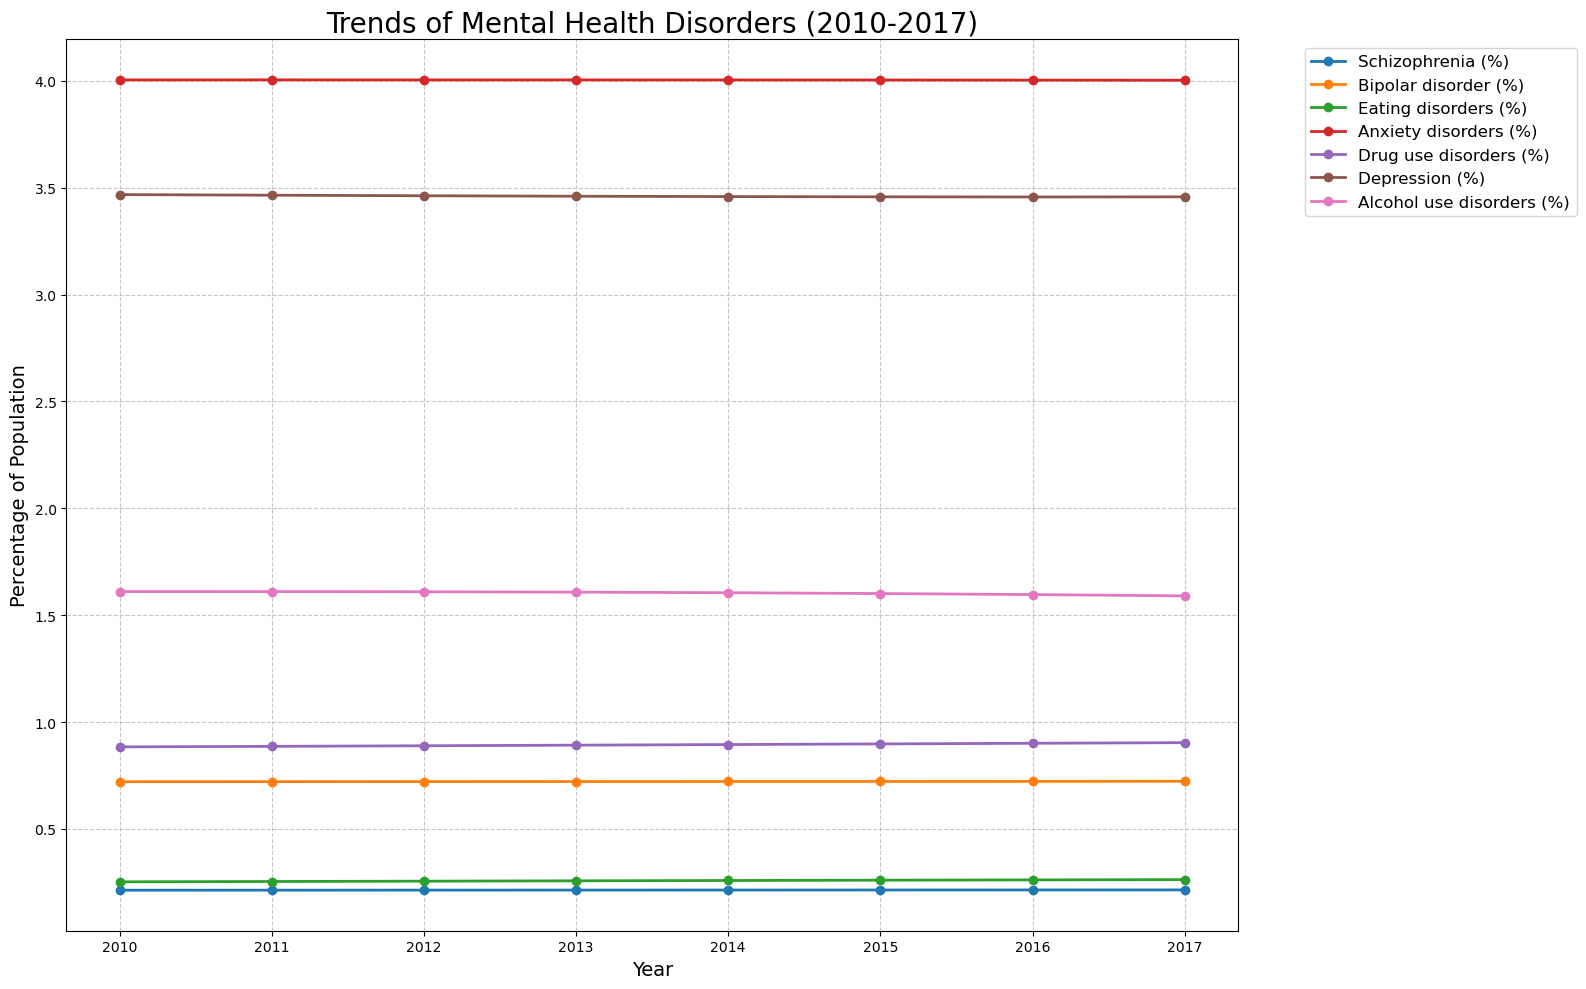

In [19]:
# 1. Improved Trend Analysis of Multiple Mental Health Disorders
plt.figure(figsize=(16, 10))
for disorder in disorders:
    plt.plot(yearly_avg.index, yearly_avg[disorder], label=disorder, linewidth=2, marker='o')

plt.title('Trends of Mental Health Disorders (2010-2017)', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Population', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Output_PNG/mental_health_trends.png', dpi=300, bbox_inches='tight')
plt.show()

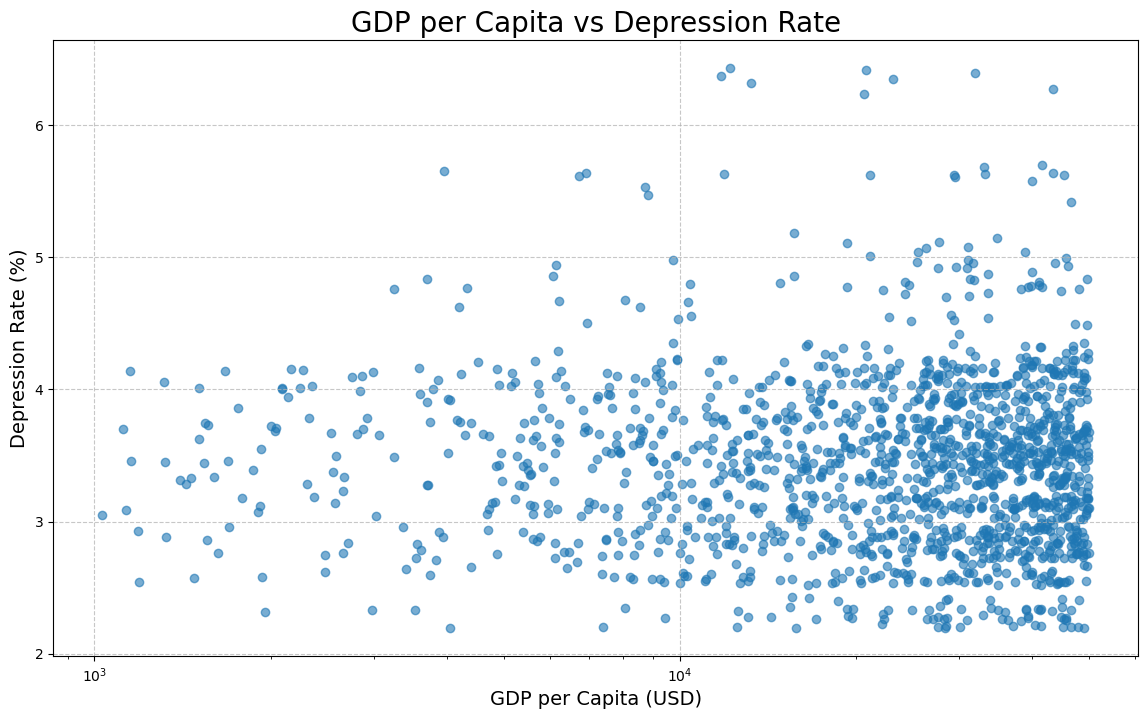

In [20]:
# 2. Improved Correlation between Depression and GDP per Capita
gdp_per_capita = Macro_Disorder_ext_df['GDP per Capita (USD)']
depression_rate = Macro_Disorder_ext_df['Depression (%)']

plt.figure(figsize=(14, 8))
plt.scatter(gdp_per_capita, depression_rate, alpha=0.6)
plt.xlabel('GDP per Capita (USD)', fontsize=14)
plt.ylabel('Depression Rate (%)', fontsize=14)
plt.title('GDP per Capita vs Depression Rate', fontsize=20)
plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.7)

/var/folders/m6/bhhzzj012vq18r_pf4rv2l640000gn/T/ipykernel_10755/2711923824.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disorder_by_income = Macro_Disorder_ext_df.groupby(income_groups)[disorders].mean()


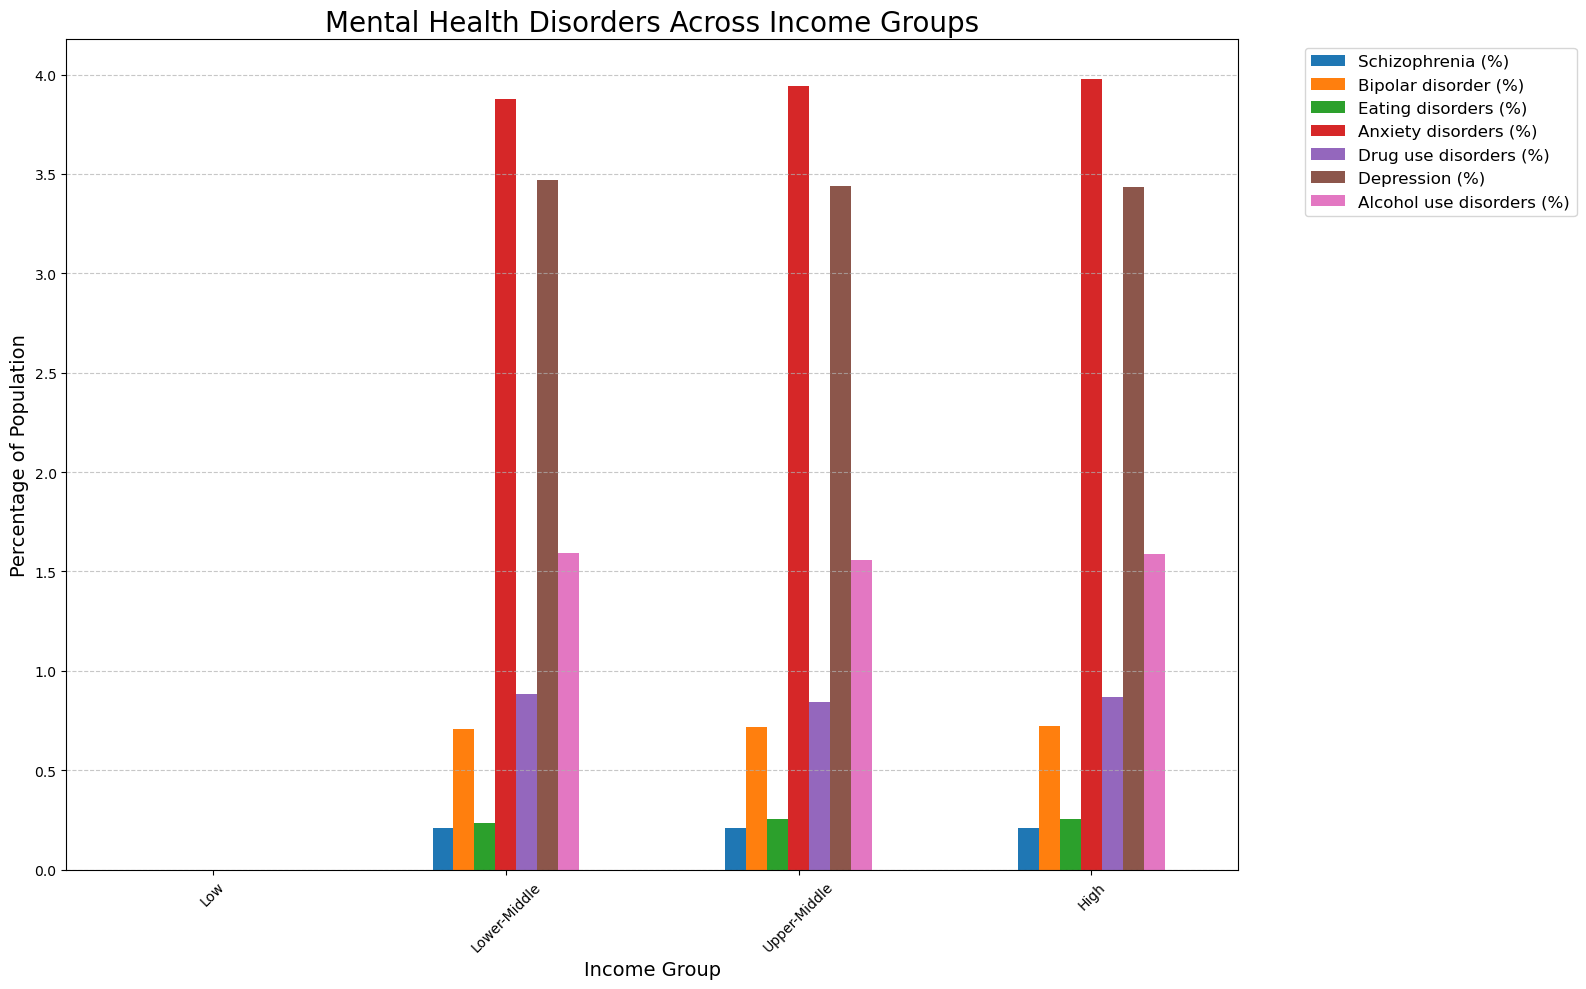

In [21]:
# 3. Improved Comparison of Mental Health Disorders Across Income Groups
income_groups = pd.cut(Macro_Disorder_ext_df['GDP per Capita (USD)'], 
                       bins=[0, 1000, 5000, 20000, np.inf], 
                       labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])
disorder_by_income = Macro_Disorder_ext_df.groupby(income_groups)[disorders].mean()

disorder_by_income.plot(kind='bar', figsize=(16, 10))
plt.title('Mental Health Disorders Across Income Groups', fontsize=20)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Percentage of Population', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Output_PNG/disorders_by_income.png', dpi=300, bbox_inches='tight')
plt.show()

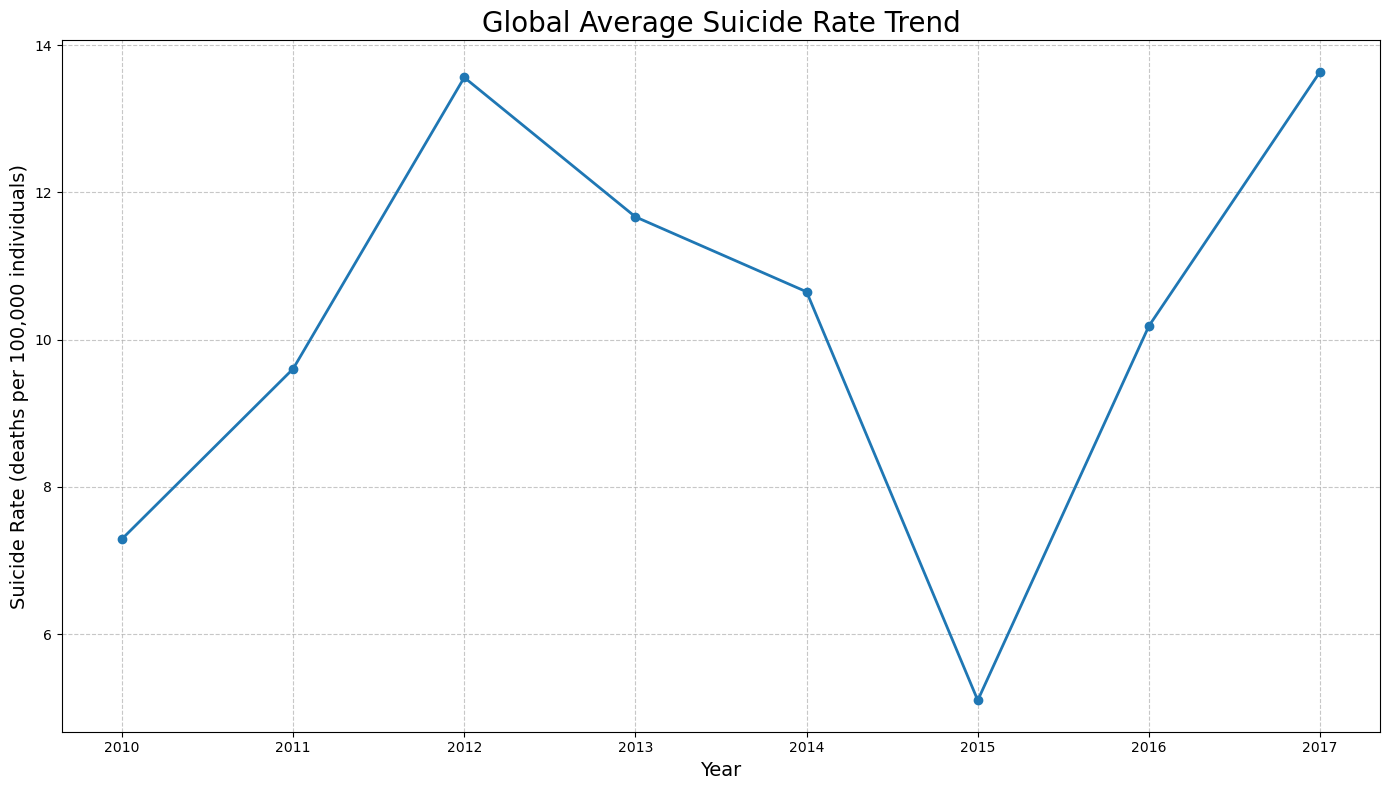

In [22]:
# 4. Improved Time Series Analysis of Suicide Rates
suicide_rates = Suicide_rate_df.groupby('Year')['Suicide rate (deaths per 100,000 individuals)'].mean()

plt.figure(figsize=(14, 8))
plt.plot(suicide_rates.index, suicide_rates.values, marker='o', linewidth=2)
plt.title('Global Average Suicide Rate Trend', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Suicide Rate (deaths per 100,000 individuals)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Output_PNG/suicide_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

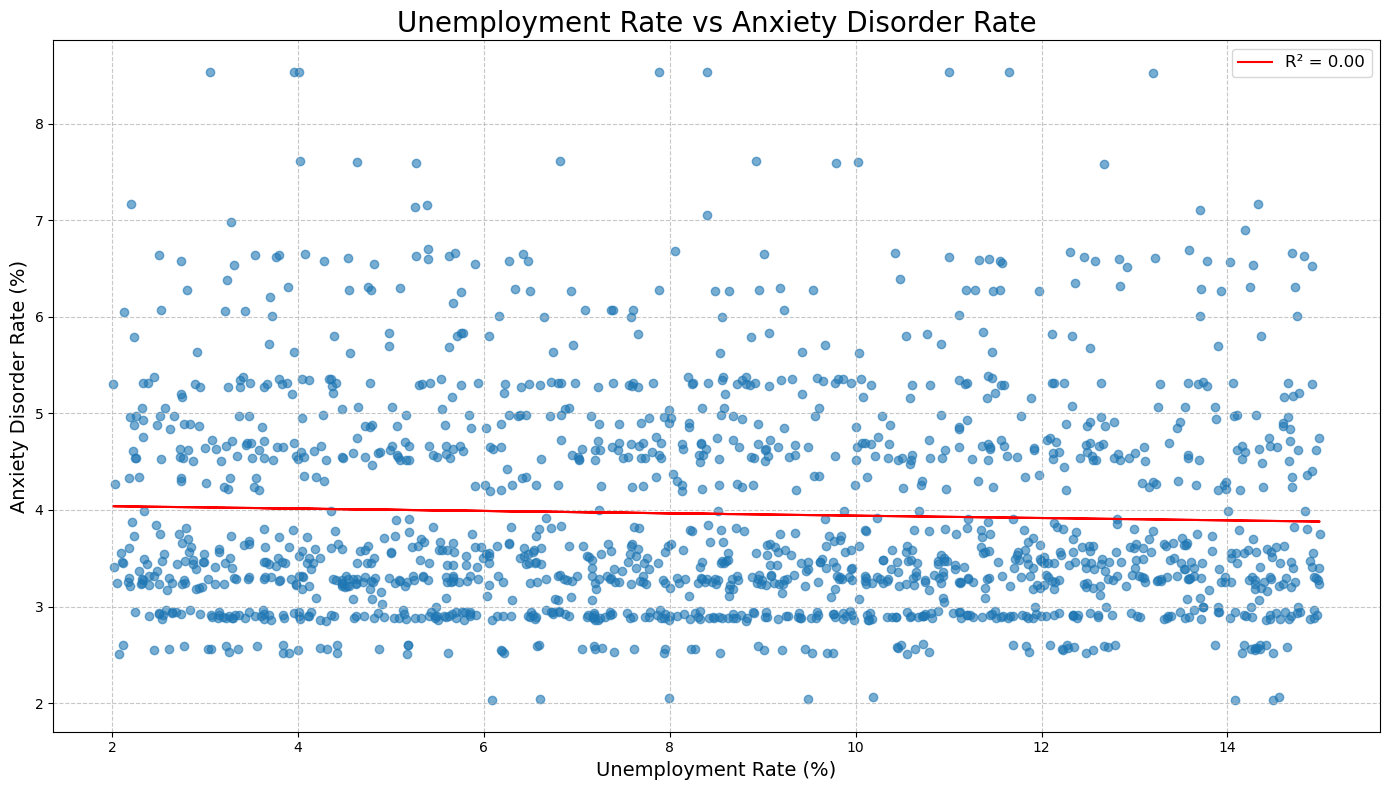

Correlation coefficient: -0.04
P-value: 0.1122


In [23]:
# 5. Improved Relationship between Unemployment and Anxiety Disorders
unemployment_rate = Macro_Disorder_ext_df['Unemployment (%)']
anxiety_rate = Macro_Disorder_ext_df['Anxiety disorders (%)']

plt.figure(figsize=(14, 8))
plt.scatter(unemployment_rate, anxiety_rate, alpha=0.6)
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Anxiety Disorder Rate (%)', fontsize=14)
plt.title('Unemployment Rate vs Anxiety Disorder Rate', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Add regression line
slope, intercept, r_value, p_value, std_err = linregress(unemployment_rate, anxiety_rate)
line = slope * unemployment_rate + intercept
plt.plot(unemployment_rate, line, color='red', label=f'R² = {r_value**2:.2f}')

plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Output_PNG/unemployment_vs_anxiety.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")

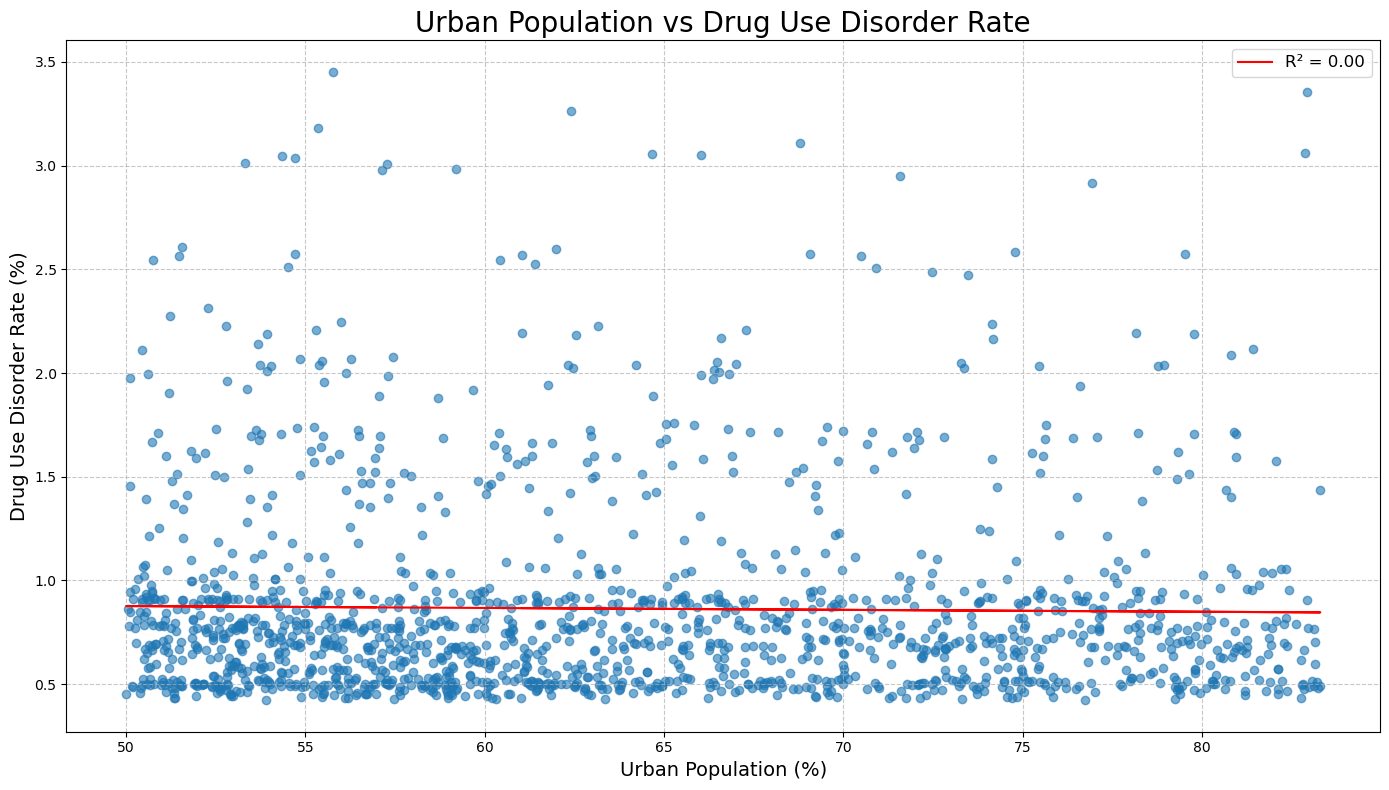

Correlation coefficient: -0.02
P-value: 0.4744


In [24]:
# 6. Improved Analysis of Urban Population and Drug Use Disorders
urban_population_pct = Macro_Disorder_ext_df['Urban Population'] / Macro_Disorder_ext_df['Population'] * 100
drug_use_rate = Macro_Disorder_ext_df['Drug use disorders (%)']

plt.figure(figsize=(14, 8))
plt.scatter(urban_population_pct, drug_use_rate, alpha=0.6)
plt.xlabel('Urban Population (%)', fontsize=14)
plt.ylabel('Drug Use Disorder Rate (%)', fontsize=14)
plt.title('Urban Population vs Drug Use Disorder Rate', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Add regression line
slope, intercept, r_value, p_value, std_err = linregress(urban_population_pct, drug_use_rate)
line = slope * urban_population_pct + intercept
plt.plot(urban_population_pct, line, color='red', label=f'R² = {r_value**2:.2f}')

plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Output_PNG/urban_population_vs_drug_use.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")

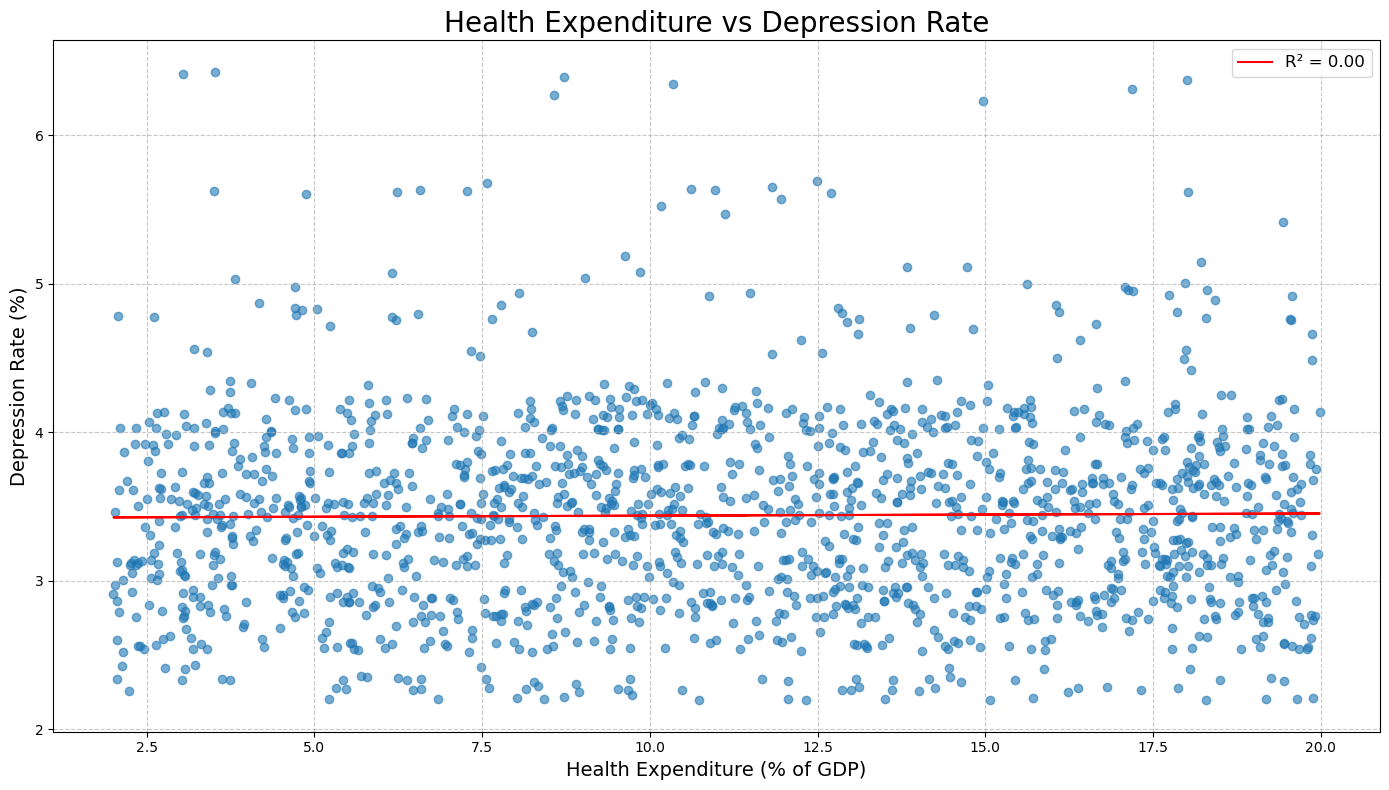

Correlation coefficient: 0.01
P-value: 0.6509


In [25]:
# 7. Improved Impact of Health Expenditure on Depression Rates
health_expenditure = Macro_Disorder_ext_df['Percentage GDP Health Expenditure']
depression_rate = Macro_Disorder_ext_df['Depression (%)']

plt.figure(figsize=(14, 8))
plt.scatter(health_expenditure, depression_rate, alpha=0.6)
plt.xlabel('Health Expenditure (% of GDP)', fontsize=14)
plt.ylabel('Depression Rate (%)', fontsize=14)
plt.title('Health Expenditure vs Depression Rate', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Add regression line
slope, intercept, r_value, p_value, std_err = linregress(health_expenditure, depression_rate)
line = slope * health_expenditure + intercept
plt.plot(health_expenditure, line, color='red', label=f'R² = {r_value**2:.2f}')

plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Output_PNG/health_expenditure_vs_depression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")

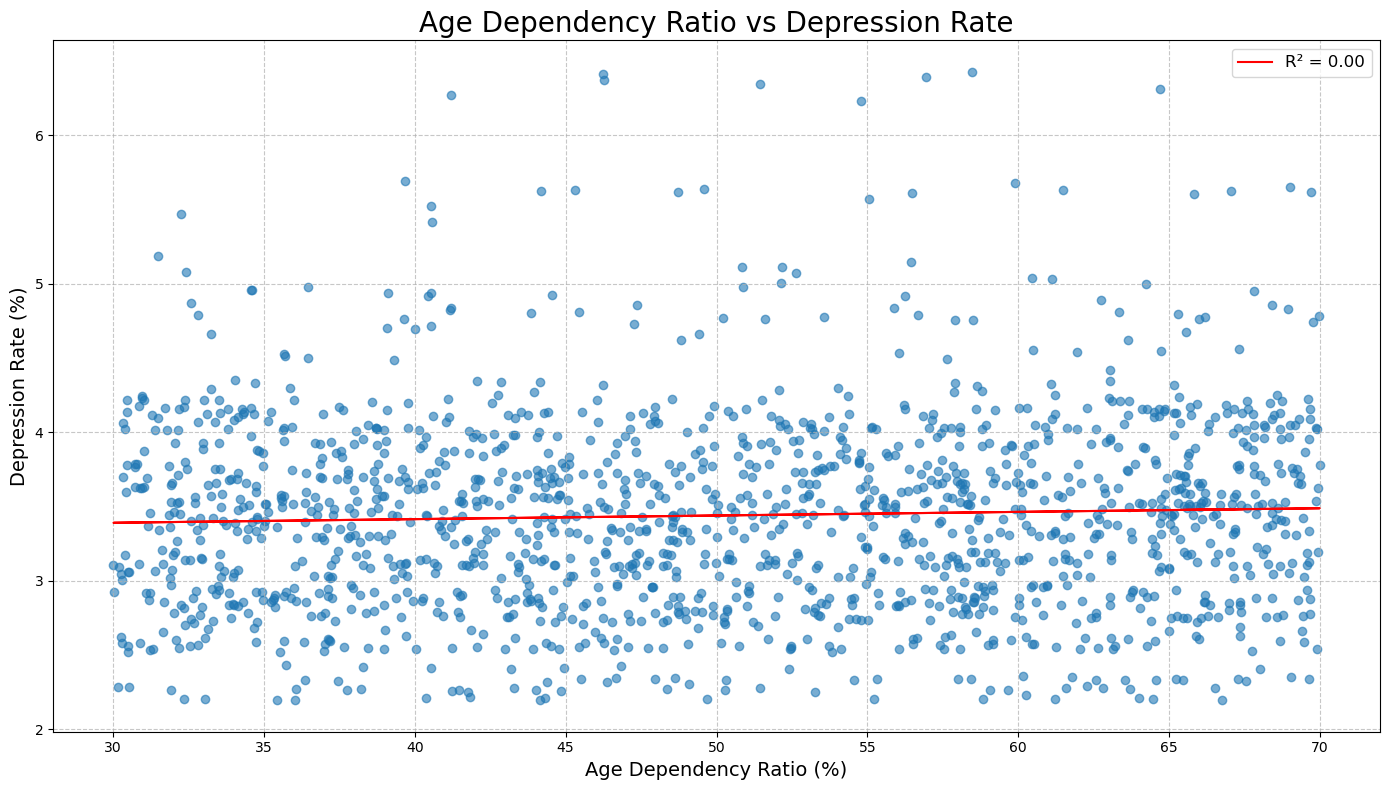

Correlation coefficient: 0.04
P-value: 0.0881


In [26]:
# 8. Improved Age Dependency Ratio and Its Impact on Mental Health
age_dep_ratio = Macro_Disorder_ext_df['Age Dependency Ratio (%)']
depression_rate = Macro_Disorder_ext_df['Depression (%)']

plt.figure(figsize=(14, 8))
plt.scatter(age_dep_ratio, depression_rate, alpha=0.6)
plt.xlabel('Age Dependency Ratio (%)', fontsize=14)
plt.ylabel('Depression Rate (%)', fontsize=14)
plt.title('Age Dependency Ratio vs Depression Rate', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Add regression line
slope, intercept, r_value, p_value, std_err = linregress(age_dep_ratio, depression_rate)
line = slope * age_dep_ratio + intercept
plt.plot(age_dep_ratio, line, color='red', label=f'R² = {r_value**2:.2f}')

plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Output_PNG/age_dependency_vs_depression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")

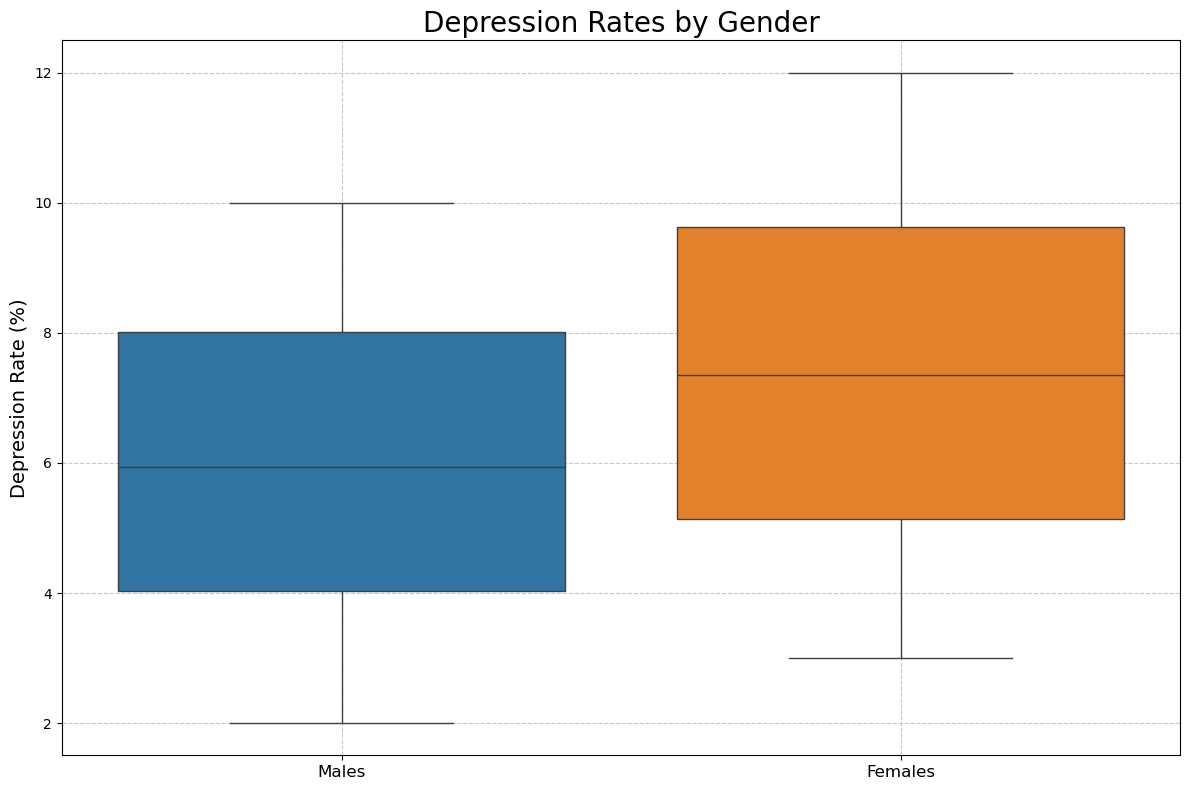

In [27]:
# 9. Improved Comparison of Mental Health Disorders Between Genders
male_depression = Gender_Depression_df['Prevalence in males (%)']
female_depression = Gender_Depression_df['Prevalence in females (%)']

plt.figure(figsize=(12, 8))
sns.boxplot(data=[male_depression, female_depression])
plt.xticks([0, 1], ['Males', 'Females'], fontsize=12)
plt.title('Depression Rates by Gender', fontsize=20)
plt.ylabel('Depression Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Output_PNG/depression_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

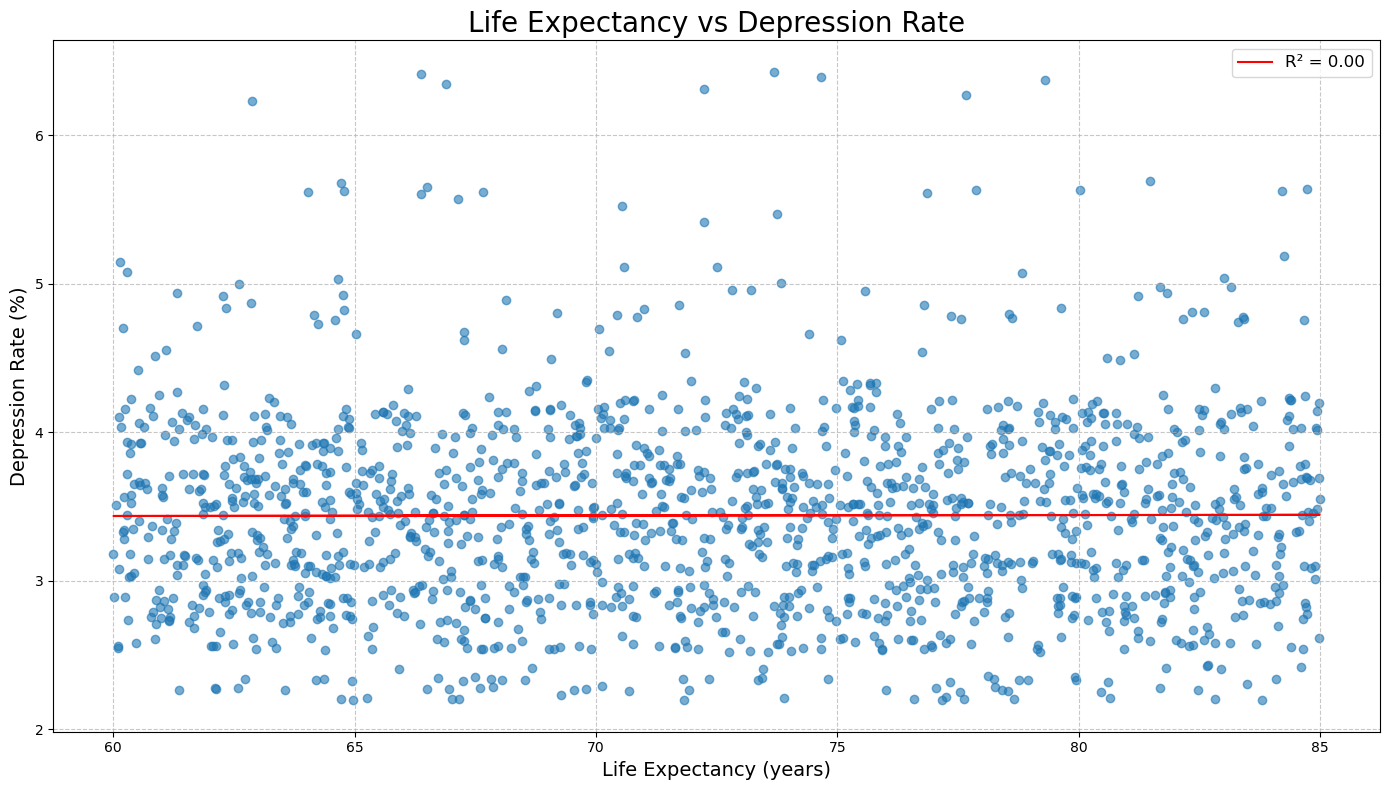

Correlation coefficient: 0.00
P-value: 0.8931


In [28]:
# 10. Improved Relationship Between Life Expectancy and Mental Health
life_expectancy = Macro_Disorder_ext_df['Life Expectancy']
depression_rate = Macro_Disorder_ext_df['Depression (%)']

plt.figure(figsize=(14, 8))
plt.scatter(life_expectancy, depression_rate, alpha=0.6)
plt.xlabel('Life Expectancy (years)', fontsize=14)
plt.ylabel('Depression Rate (%)', fontsize=14)
plt.title('Life Expectancy vs Depression Rate', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Add regression line
slope, intercept, r_value, p_value, std_err = linregress(life_expectancy, depression_rate)
line = slope * life_expectancy + intercept
plt.plot(life_expectancy, line, color='red', label=f'R² = {r_value**2:.2f}')


plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Output_PNG/life_expectancy_vs_depression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.4f}")

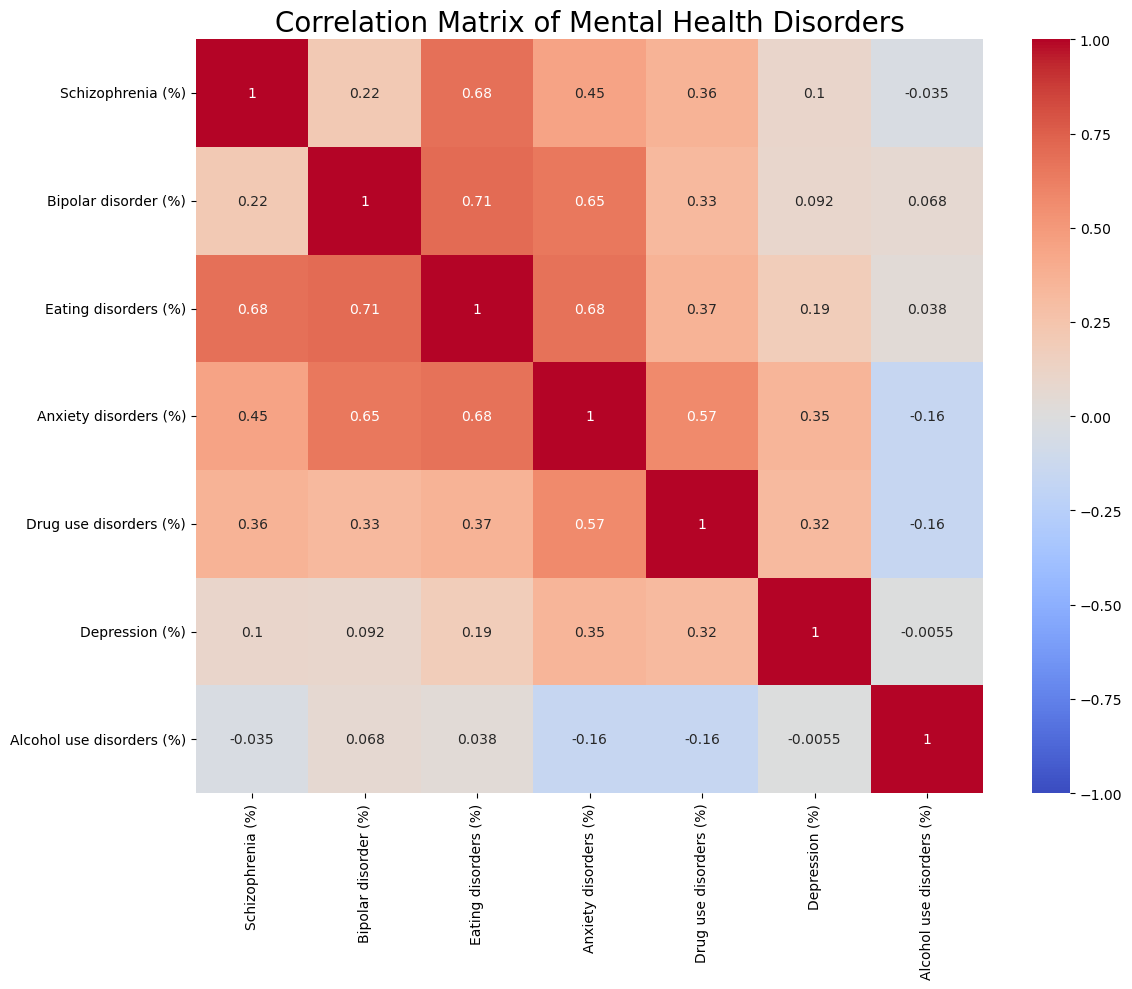

In [29]:
# Additional analysis: Correlation matrix of all disorders
plt.figure(figsize=(12, 10))
correlation_matrix = Macro_Disorder_ext_df[disorders].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Mental Health Disorders', fontsize=20)
plt.tight_layout()
plt.savefig('Output_PNG/disorder_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# Summary statistics
print("\nSummary Statistics:")
print(Macro_Disorder_ext_df[disorders + ['GDP per Capita (USD)', 'Percentage GDP Health Expenditure', 'Unemployment (%)', 'Life Expectancy']].describe())


Summary Statistics:
       Anxiety disorders (%)  Drug use disorders (%)  Depression (%)  \
count            1568.000000             1568.000000     1568.000000   
mean                3.960224                0.864041        3.439816   
std                 1.132754                0.480854        0.659471   
min                 2.028608                0.422246        2.194091   
25%                 3.189381                0.532756        2.937312   
50%                 3.545931                0.721627        3.433400   
75%                 4.657269                0.913821        3.824402   
max                 8.539988                3.452476        6.429117   

       Alcohol use disorders (%)  GDP per Capita (USD)  \
count                1568.000000           1568.000000   
mean                    1.578541          26171.470754   
std                     0.860352          14148.470466   
min                     0.462937           1032.293249   
25%                     0.968251        

In [31]:
# Save the Macro_Disorder_ext_df to a CSV file for future use
Macro_Disorder_ext_df.to_csv('Macro_Disorder_ext_data.csv', index=False)
print("\nThe extended dataset has been saved as 'Macro_Disorder_ext_data.csv'")


The extended dataset has been saved as 'Macro_Disorder_ext_data.csv'
